<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/%C5%9Eirket%C3%A7al%C4%B1%C5%9Fanverileriyledemografikanaliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adım 1: Gerekli Kütüphaneleri Yükleme


In [1]:
!pip install faker  # Fake veri oluşturmak için
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00


Adım 2: Sentetik Veri Oluşturma (100 Çalışan)


In [4]:
# Fake veri üreteci
fake = Faker('tr_TR')  # Türkçe isimler için

# Rastgele departman, eğitim ve şehir seçenekleri
departmanlar = ['Yazılım', 'Satış', 'İK', 'Finans', 'Pazarlama']
egitim_seviyeleri = ['Lisans', 'Yüksek Lisans', 'Doktora']
sehirler = ['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Antalya']

# Boş DataFrame oluştur
data = {
    'CalisanID': [],
    'Ad': [],
    'Yas': [],
    'Cinsiyet': [],
    'Departman': [],
    'Egitim': [],
    'Kıdem': [],
    'Lokasyon': []
}

# 100 çalışan için veri üret
for i in range(1, 101):
    data['CalisanID'].append(i)
    data['Ad'].append(fake.name())
    data['Yas'].append(np.random.randint(22, 60))
    data['Cinsiyet'].append(np.random.choice(['Erkek', 'Kadın'], p=[0.55, 0.45]))
    data['Departman'].append(np.random.choice(departmanlar, p=[0.3, 0.2, 0.1, 0.2, 0.2]))
    data['Egitim'].append(np.random.choice(egitim_seviyeleri, p=[0.7, 0.25, 0.05]))
    data['Kıdem'].append(np.random.randint(0, 15))
    data['Lokasyon'].append(np.random.choice(sehirler))

df = pd.DataFrame(data)

Adım 3: Veriyi İnceleyelim


In [5]:
# İlk 5 kayıt
print("Örnek Veri:")
print(df.head())

# Temel istatistikler
print("\nTemel İstatistikler:")
print(df.describe())

# Eksik veri kontrolü
print("\nEksik Veri Sayısı:")
print(df.isnull().sum())

Örnek Veri:
   CalisanID                               Ad  Yas Cinsiyet Departman  \
0          1  Prof. Semrin Canan Şensoy Yaman   46    Erkek     Satış   
1          2                       Bali Zorlu   37    Kadın        İK   
2          3               Elgin Cannur Aslan   49    Kadın    Finans   
3          4           Burakhan Duruk Demirel   55    Kadın     Satış   
4          5        Öğr. Varlık Mihriye Şener   25    Kadın   Yazılım   

    Egitim  Kıdem  Lokasyon  
0   Lisans      6     İzmir  
1   Lisans      4   Antalya  
2  Doktora      0   Antalya  
3   Lisans      4  İstanbul  
4   Lisans      3     Bursa  

Temel İstatistikler:
        CalisanID         Yas       Kıdem
count  100.000000  100.000000  100.000000
mean    50.500000   40.920000    7.090000
std     29.011492   12.419177    4.065362
min      1.000000   22.000000    0.000000
25%     25.750000   28.000000    4.000000
50%     50.500000   41.500000    7.000000
75%     75.250000   53.000000   10.250000
max    100.

Adım 4: Görselleştirmeler
A. Yaş Dağılımı

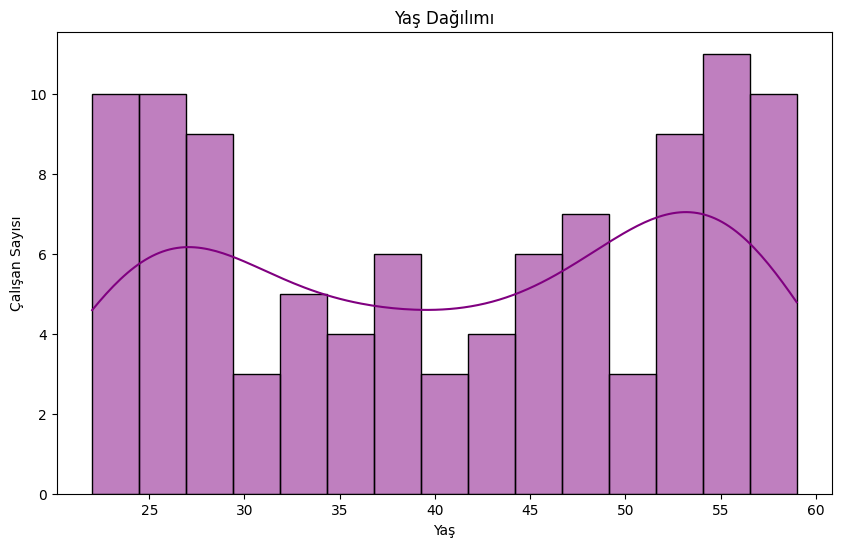

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yas'], bins=15, kde=True, color='purple')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Çalışan Sayısı')
plt.show()

B. Cinsiyet Dağılımı


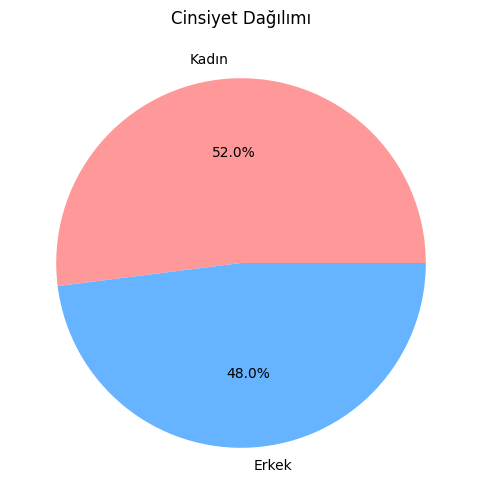

In [7]:
plt.figure(figsize=(6, 6))
df['Cinsiyet'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Cinsiyet Dağılımı')
plt.ylabel('')
plt.show()

C. Departmanlara Göre Çalışan Sayısı


<ipython-input-8-3dcdb88655f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Departman', data=df, order=df['Departman'].value_counts().index, palette='viridis')


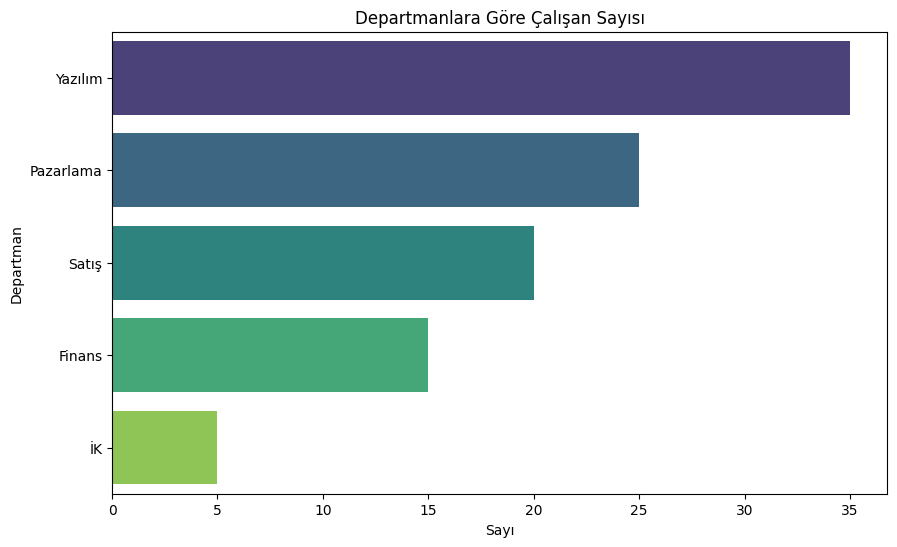

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Departman', data=df, order=df['Departman'].value_counts().index, palette='viridis')
plt.title('Departmanlara Göre Çalışan Sayısı')
plt.xlabel('Sayı')
plt.ylabel('Departman')
plt.show()

D. Eğitim Seviyesi


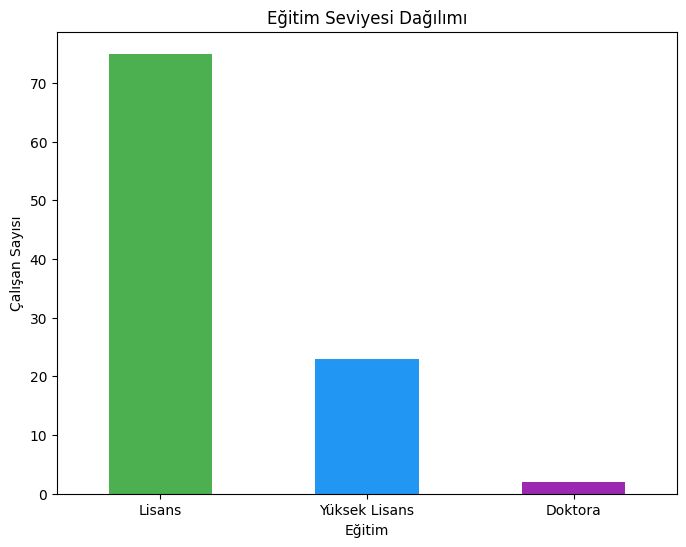

In [9]:
plt.figure(figsize=(8, 6))
df['Egitim'].value_counts().plot.bar(color=['#4CAF50', '#2196F3', '#9C27B0'])
plt.title('Eğitim Seviyesi Dağılımı')
plt.xlabel('Eğitim')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=0)
plt.show()

E. Kıdem vs Yaş İlişkisi


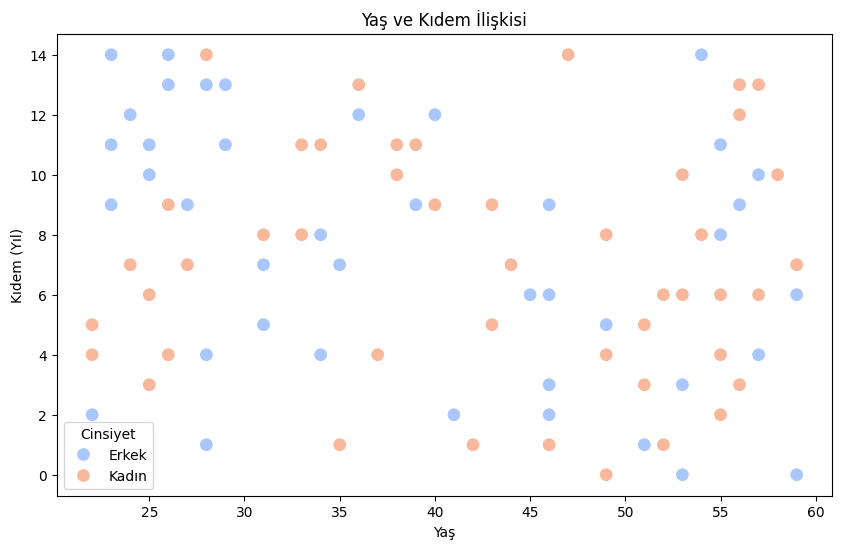

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yas', y='Kıdem', data=df, hue='Cinsiyet', palette='coolwarm', s=100)
plt.title('Yaş ve Kıdem İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Kıdem (Yıl)')
plt.legend(title='Cinsiyet')
plt.show()

Adım 5: İleri Analiz
Departmanlara Göre Ortalama Yaş

<ipython-input-11-af1a7dfd4da6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departman', y='Yas', data=df, palette='Set2')


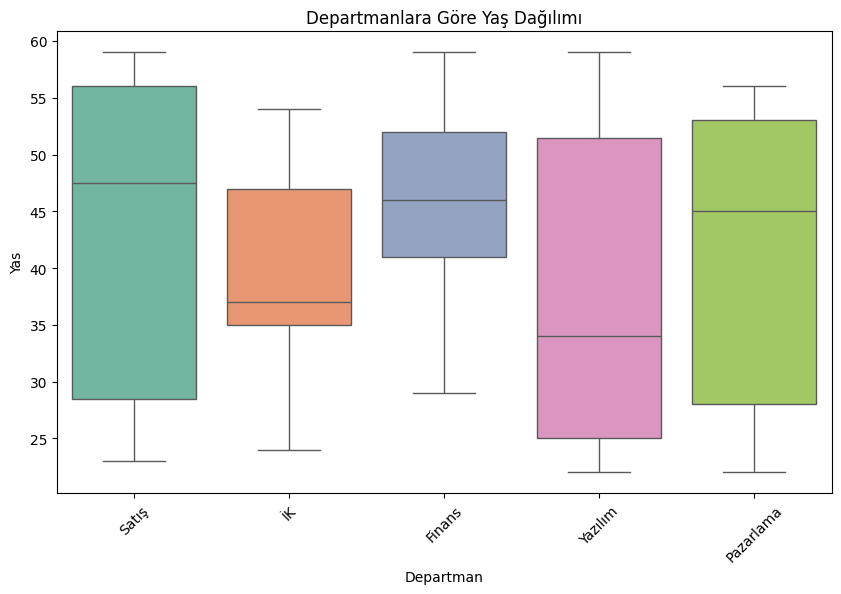

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Departman', y='Yas', data=df, palette='Set2')
plt.title('Departmanlara Göre Yaş Dağılımı')
plt.xticks(rotation=45)
plt.show()

Cinsiyet ve Departman İlişkisi


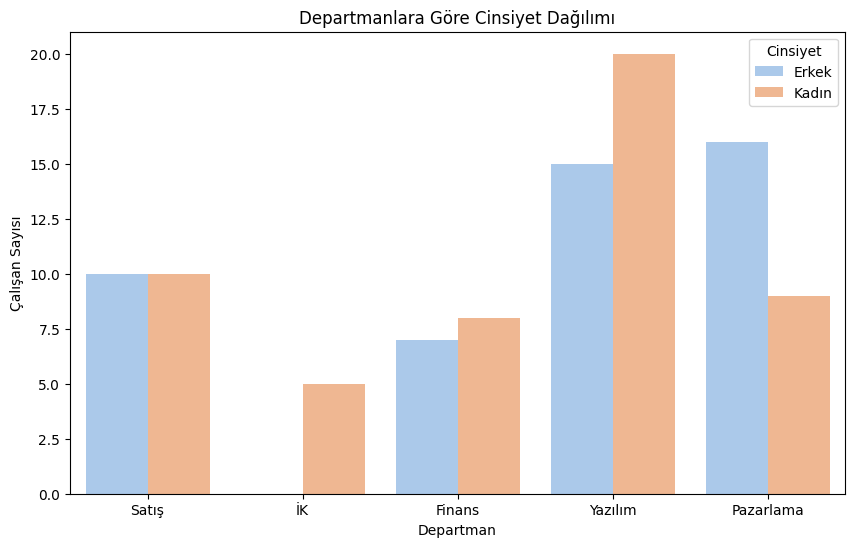

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Departman', hue='Cinsiyet', data=df, palette='pastel')
plt.title('Departmanlara Göre Cinsiyet Dağılımı')
plt.xlabel('Departman')
plt.ylabel('Çalışan Sayısı')
plt.legend(title='Cinsiyet')
plt.show()

Adım 6: Veriyi CSV Olarak Kaydetme (Opsiyonel)


In [13]:
df.to_csv('sentetik_calisan_verisi.csv', index=False)
print("Veri CSV olarak kaydedildi!")

Veri CSV olarak kaydedildi!
